# Sleep Disorder

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'Sleep_health_and_lifestyle_dataset.csv')

In [3]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [4]:
df.shape

(374, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


## Data Preprocessing

In [6]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [7]:
df.duplicated().count()

374

In [8]:
print(df['Sleep Disorder'].unique())

[nan 'Sleep Apnea' 'Insomnia']


In [9]:
# Replace NaN values with 'None' for the 'Sleep Disorder' column
df['Sleep Disorder'].fillna('None',inplace = True)

In [10]:
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [11]:
# Encode 'Sleep Disorder' as numerical labels
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Sleep Disorder'] = label_encoder.fit_transform(df['Sleep Disorder'])
print(label_encoder.classes_)


['Insomnia' 'None' 'Sleep Apnea']


In [12]:
# Distribution of classes in 'Sleep Disorder'
print(df['Sleep Disorder'].value_counts())


Sleep Disorder
1    219
2     78
0     77
Name: count, dtype: int64


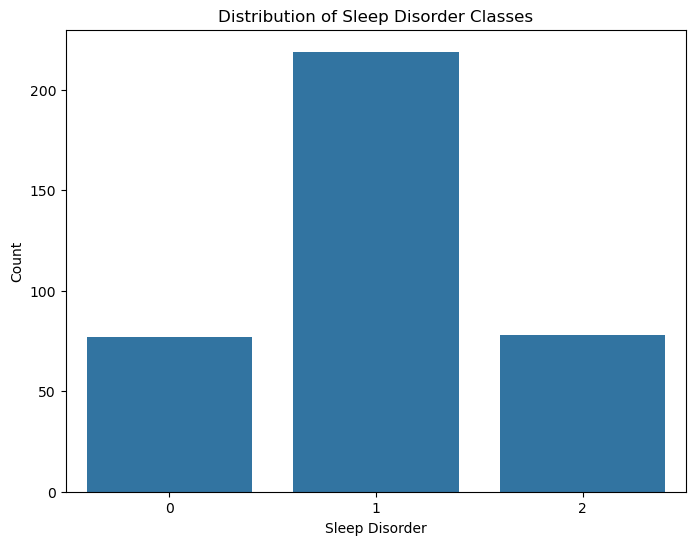

In [13]:
plt.figure(figsize = (8,6))
sns.countplot(x = 'Sleep Disorder',data = df)
plt.title('Distribution of Sleep Disorder Classes')
plt.xlabel('Sleep Disorder')
plt.ylabel('Count')
plt.show()

In [14]:
# Handling missing values
from sklearn.impute import SimpleImputer
numerical_cols = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 
                  'Stress Level','Heart Rate', 'Daily Steps']
imputer_num = SimpleImputer(strategy = 'median')
df[numerical_cols] = imputer_num.fit_transform(df[numerical_cols])

df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [15]:
# Converting Categorical Columns to Numeric
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
label_encoder1 = LabelEncoder()
df['Occupation'] = label_encoder1.fit_transform(df['Occupation'])
label_encoder2 = LabelEncoder()
df['BMI Category'] = label_encoder2.fit_transform(df['BMI Category'])


df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,0,27.0,9,6.1,6.0,42.0,6.0,3,126/83,77.0,4200.0,1
1,2,0,28.0,1,6.2,6.0,60.0,8.0,0,125/80,75.0,10000.0,1
2,3,0,28.0,1,6.2,6.0,60.0,8.0,0,125/80,75.0,10000.0,1
3,4,0,28.0,6,5.9,4.0,30.0,8.0,2,140/90,85.0,3000.0,2
4,5,0,28.0,6,5.9,4.0,30.0,8.0,2,140/90,85.0,3000.0,2


In [16]:
# Split Blood Pressure into Systolic and Diastolic
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)
df['Systolic'] = pd.to_numeric(df['Systolic'])
df['Diastolic'] = pd.to_numeric(df['Diastolic'])


df = df.drop(columns=['Blood Pressure'])

In [17]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,1,0,27.0,9,6.1,6.0,42.0,6.0,3,77.0,4200.0,1,126,83
1,2,0,28.0,1,6.2,6.0,60.0,8.0,0,75.0,10000.0,1,125,80
2,3,0,28.0,1,6.2,6.0,60.0,8.0,0,75.0,10000.0,1,125,80
3,4,0,28.0,6,5.9,4.0,30.0,8.0,2,85.0,3000.0,2,140,90
4,5,0,28.0,6,5.9,4.0,30.0,8.0,2,85.0,3000.0,2,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,1,59.0,5,8.1,9.0,75.0,3.0,3,68.0,7000.0,2,140,95
370,371,1,59.0,5,8.0,9.0,75.0,3.0,3,68.0,7000.0,2,140,95
371,372,1,59.0,5,8.1,9.0,75.0,3.0,3,68.0,7000.0,2,140,95
372,373,1,59.0,5,8.1,9.0,75.0,3.0,3,68.0,7000.0,2,140,95


## EDA

In [18]:
df.describe()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,0.494652,42.184492,3.772727,7.132086,7.312834,59.171123,5.385027,1.296791,70.165775,6816.844920,1.002674,128.553476,84.649733
std,108.108742,0.500641,8.673133,3.056081,0.795657,1.196956,20.830804,1.774526,1.431226,4.135676,1617.915679,0.644626,7.748118,6.161611
min,1.000000,0.000000,27.000000,0.000000,5.800000,4.000000,30.000000,3.000000,0.000000,65.000000,3000.000000,0.000000,115.000000,75.000000
25%,94.250000,0.000000,35.250000,1.000000,6.400000,6.000000,45.000000,4.000000,0.000000,68.000000,5600.000000,1.000000,125.000000,80.000000
50%,187.500000,0.000000,43.000000,3.000000,7.200000,7.000000,60.000000,5.000000,0.000000,70.000000,7000.000000,1.000000,130.000000,85.000000
75%,280.750000,1.000000,50.000000,5.000000,7.800000,8.000000,75.000000,7.000000,3.000000,72.000000,8000.000000,1.000000,135.000000,90.000000
max,374.000000,1.000000,59.000000,10.000000,8.500000,9.000000,90.000000,8.000000,3.000000,86.000000,10000.000000,2.000000,142.000000,95.000000


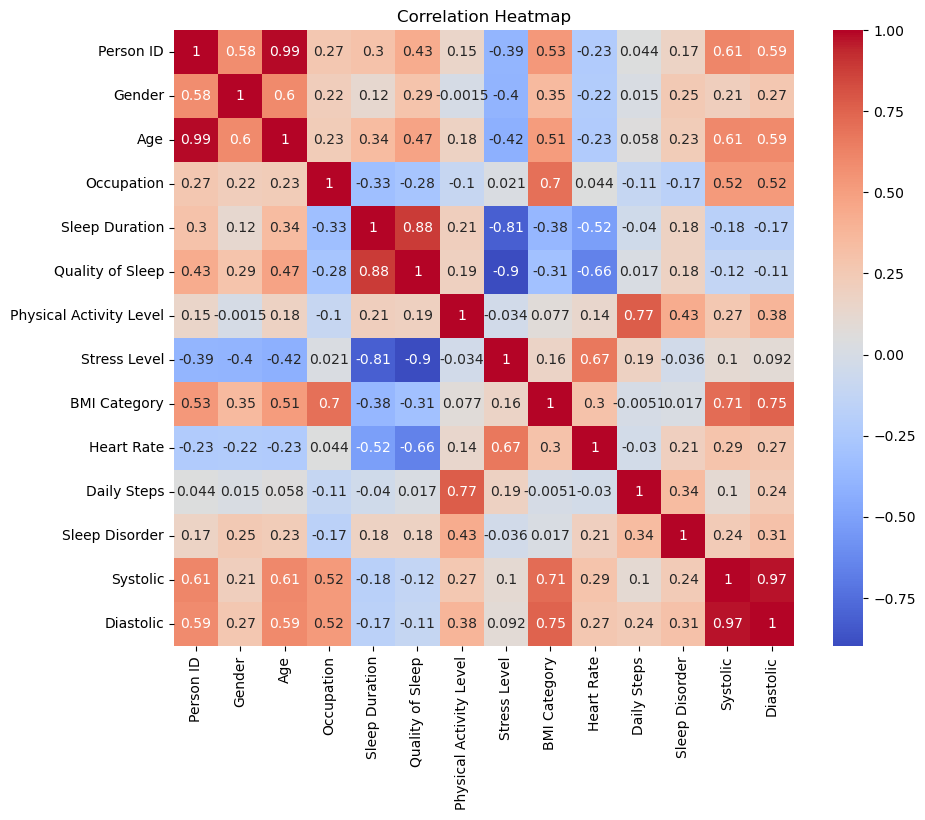

In [19]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(),annot = True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [20]:
correlation_matrix = df.corr()
sleep_disorder_correlation = correlation_matrix['Sleep Disorder'].sort_values(ascending=False)

print(sleep_disorder_correlation)

Sleep Disorder             1.000000
Physical Activity Level    0.433214
Daily Steps                0.342098
Diastolic                  0.310051
Gender                     0.253415
Systolic                   0.241786
Age                        0.232000
Heart Rate                 0.205987
Quality of Sleep           0.179592
Sleep Duration             0.177552
Person ID                  0.170980
BMI Category               0.016573
Stress Level              -0.036058
Occupation                -0.169800
Name: Sleep Disorder, dtype: float64


In [21]:
pd.crosstab(df['Sleep Disorder'],df['Gender'],normalize='columns')*100

Gender,0,1
Sleep Disorder,,
0,21.693122,19.459459
1,72.486772,44.324324
2,5.820106,36.216216


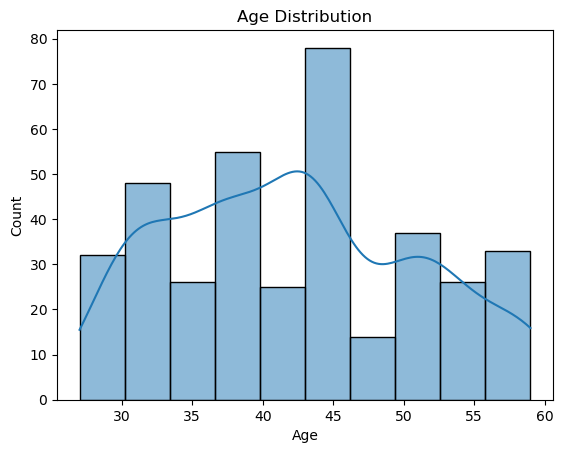

In [22]:
# Distribution plot for 'Age'
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

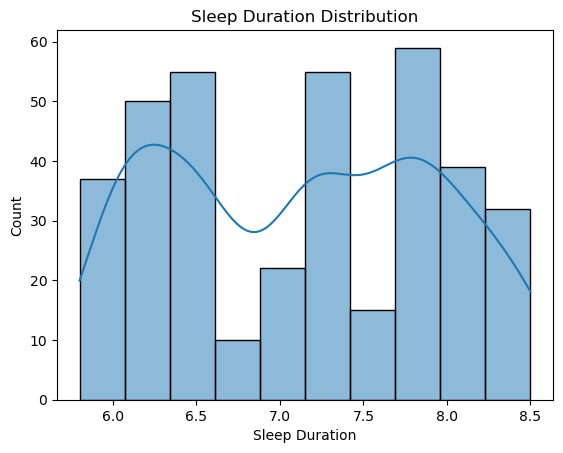

In [23]:

# Distribution plot for 'Sleep Duration'
sns.histplot(df['Sleep Duration'], kde=True)
plt.title('Sleep Duration Distribution')
plt.show()


In [24]:
# Drop columns with weak correlations to Sleep Disorder
df = df.drop(columns=['BMI Category', 'Stress Level', 'Occupation', 'Person ID'])

## Normalization 

In [25]:
from sklearn.preprocessing import StandardScaler

# Selecting features to scale
scaler = StandardScaler()
columns_to_scale = ['Age', 'Systolic', 'Diastolic', 'Daily Steps', 'Heart Rate', 'Physical Activity Level', 'Sleep Duration', 'Quality of Sleep','Gender']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


## Splitting Data

In [26]:
from sklearn.model_selection import train_test_split

# Defining features and target variable
X = df.drop(columns=['Sleep Disorder'])
y = df['Sleep Disorder']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Model 

### Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Logistic Regression Model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Predictions
y_pred_logistic = logistic_model.predict(X_test)

# Evaluation
print("\nLogistic Regression Report:")
print(classification_report(y_test, y_pred_logistic))
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)



Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        16
           1       0.95      0.98      0.97        43
           2       0.93      0.81      0.87        16

    accuracy                           0.92        75
   macro avg       0.90      0.89      0.89        75
weighted avg       0.92      0.92      0.92        75



### KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier

# KNN Model
knn_model = KNeighborsClassifier(n_neighbors=5)  # Default k=5
knn_model.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluation
print("\nK-Nearest Neighbors Report:")
print(classification_report(y_test, y_pred_knn))
knn_accuracy = accuracy_score(y_test, y_pred_knn)



K-Nearest Neighbors Report:
              precision    recall  f1-score   support

           0       0.70      0.88      0.78        16
           1       0.95      0.98      0.97        43
           2       0.91      0.62      0.74        16

    accuracy                           0.88        75
   macro avg       0.85      0.83      0.83        75
weighted avg       0.89      0.88      0.88        75



### SVM

In [29]:
from sklearn.svm import SVC

# SVM Model
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluation
print("\nSupport Vector Machine Report:")
print(classification_report(y_test, y_pred_svm))
svm_accuracy = accuracy_score(y_test, y_pred_svm)



Support Vector Machine Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        16
           1       0.95      0.98      0.97        43
           2       0.93      0.81      0.87        16

    accuracy                           0.92        75
   macro avg       0.90      0.89      0.89        75
weighted avg       0.92      0.92      0.92        75



### Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("\nRandom Forest Report:")
print(classification_report(y_test, y_pred_rf))
rf_accuracy = accuracy_score(y_test, y_pred_rf)



Random Forest Report:
              precision    recall  f1-score   support

           0       0.72      0.81      0.76        16
           1       0.95      0.98      0.97        43
           2       0.85      0.69      0.76        16

    accuracy                           0.88        75
   macro avg       0.84      0.83      0.83        75
weighted avg       0.88      0.88      0.88        75



### Gradient Boosting

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting Model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluation
print("\nGradient Boosting Classifier Report:")
print(classification_report(y_test, y_pred_gb))
gb_accuracy = accuracy_score(y_test, y_pred_gb)



Gradient Boosting Classifier Report:
              precision    recall  f1-score   support

           0       0.72      0.81      0.76        16
           1       0.95      0.98      0.97        43
           2       0.85      0.69      0.76        16

    accuracy                           0.88        75
   macro avg       0.84      0.83      0.83        75
weighted avg       0.88      0.88      0.88        75




Model Accuracy Comparison:
Logistic Regression: 0.92
Random Forest: 0.88
Support Vector Machine: 0.92
K-Nearest Neighbors: 0.88
Gradient Boosting: 0.88


(0.0, 1.0)

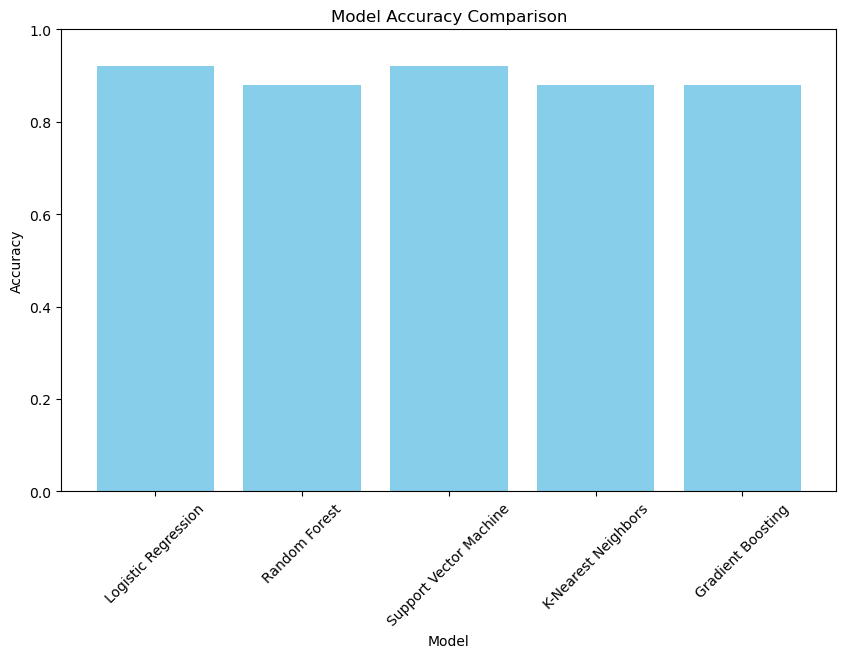

In [32]:

model_accuracies = {
    "Logistic Regression": logistic_accuracy,
    "Random Forest": rf_accuracy,
    "Support Vector Machine": svm_accuracy,
    "K-Nearest Neighbors": knn_accuracy,
    "Gradient Boosting": gb_accuracy
}


print("\nModel Accuracy Comparison:")
for model, accuracy in model_accuracies.items():
    print(f"{model}: {accuracy:.2f}")


plt.figure(figsize=(10, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color='skyblue')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45) 
plt.ylim(0, 1)  


### Hyperparameter Tuning

In [33]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.1, 1, 10, 100],  
    'solver': ['lbfgs', 'liblinear']
}


grid_search_lr = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42),
                              param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)


print("\nBest parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best cross-validation accuracy for Logistic Regression:",
      grid_search_lr.best_score_)
logistic_model_tuned = grid_search_lr.best_estimator_



Best parameters for Logistic Regression: {'C': 1, 'solver': 'liblinear'}
Best cross-validation accuracy for Logistic Regression: 0.9197175141242939


In [34]:
# Hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                              param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)


print("\nBest parameters for Random Forest:", grid_search_rf.best_params_)
print("Best cross-validation accuracy for Random Forest:",
      grid_search_rf.best_score_)
rf_model_tuned = grid_search_rf.best_estimator_



Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation accuracy for Random Forest: 0.9163841807909605


In [35]:
# Hyperparameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']  
}


grid_search_svm = GridSearchCV(SVC(probability=True, random_state=42),
                               param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)


print("\nBest parameters for SVM:", grid_search_svm.best_params_)
print("Best cross-validation accuracy for SVM:", grid_search_svm.best_score_)
svm_model_tuned = grid_search_svm.best_estimator_



Best parameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation accuracy for SVM: 0.9263841807909605


In [36]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1: Manhattan distance, 2: Euclidean distance
}


grid_search_knn = GridSearchCV(KNeighborsClassifier(),
                               param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)


print("\nBest parameters for KNN:", grid_search_knn.best_params_)
print("Best cross-validation accuracy for KNN:", grid_search_knn.best_score_)
knn_model_tuned = grid_search_knn.best_estimator_



Best parameters for KNN: {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Best cross-validation accuracy for KNN: 0.9030508474576273


In [37]:
# Hyperparameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}


grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=42),
                              param_grid_gb, cv=5, scoring='accuracy')
grid_search_gb.fit(X_train, y_train)


print("\nBest parameters for Gradient Boosting:", grid_search_gb.best_params_)
print("Best cross-validation accuracy for Gradient Boosting:",
      grid_search_gb.best_score_)
gb_model_tuned = grid_search_gb.best_estimator_



Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best cross-validation accuracy for Gradient Boosting: 0.9130508474576272



Logistic Regression Accuracy After Tuning: 0.92

Random Forest Accuracy After Tuning: 0.88

Support Vector Machine Accuracy After Tuning: 0.92

K-Nearest Neighbors Accuracy After Tuning: 0.88

Gradient Boosting Accuracy After Tuning: 0.89


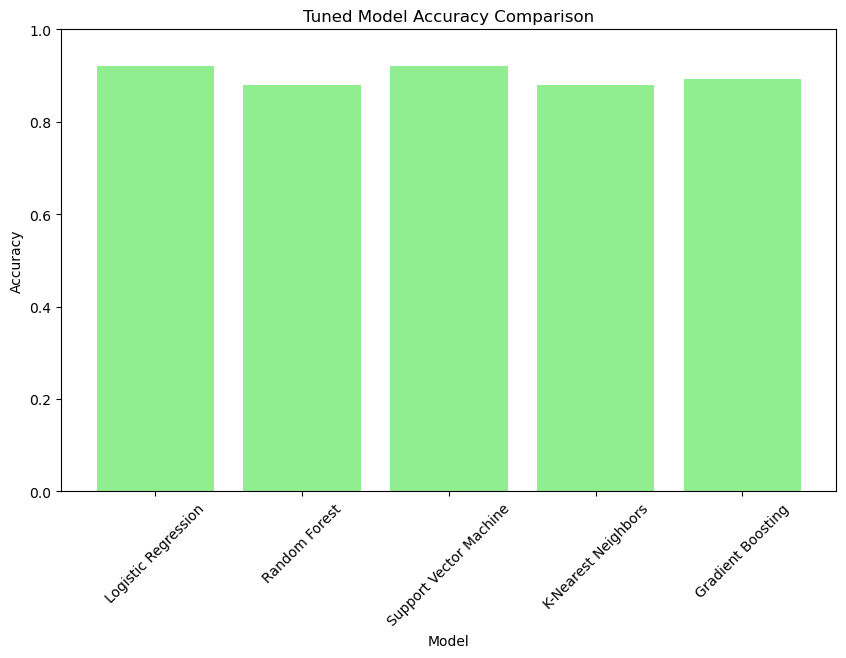

In [38]:
# Evaluate tuned models
models_tuned = {
    "Logistic Regression": logistic_model_tuned,
    "Random Forest": rf_model_tuned,
    "Support Vector Machine": svm_model_tuned,
    "K-Nearest Neighbors": knn_model_tuned,
    "Gradient Boosting": gb_model_tuned
}

# Evaluate and compare tuned model performances
model_accuracies_tuned = {}

for name, model in models_tuned.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies_tuned[name] = accuracy
    print(f"\n{name} Accuracy After Tuning: {accuracy:.2f}")

# Bar plot for tuned accuracy comparison
plt.figure(figsize=(10, 6))
plt.bar(model_accuracies_tuned.keys(), model_accuracies_tuned.values(), color='lightgreen')
plt.title('Tuned Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()


## Neural Network

Epoch 1/100


C:\Users\manda\anaconda3\envs\mlcourse301\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5029 - loss: 1.0399 - val_accuracy: 0.6833 - val_loss: 0.9290
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6894 - loss: 0.8912 - val_accuracy: 0.7500 - val_loss: 0.8156
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7518 - loss: 0.7614 - val_accuracy: 0.8167 - val_loss: 0.7264
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7914 - loss: 0.6746 - val_accuracy: 0.8333 - val_loss: 0.6597
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8292 - loss: 0.5531 - val_accuracy: 0.8667 - val_loss: 0.6135
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8083 - loss: 0.5410 - val_accuracy: 0.8833 - val_loss: 0.5907
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8561 - loss: 0.4635 - val_accuracy: 0.8667 - val_loss: 0.5784
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8827 - loss: 0.4478 - val_accuracy: 0.8667 - val_loss: 0.5729
Epoch 9/100

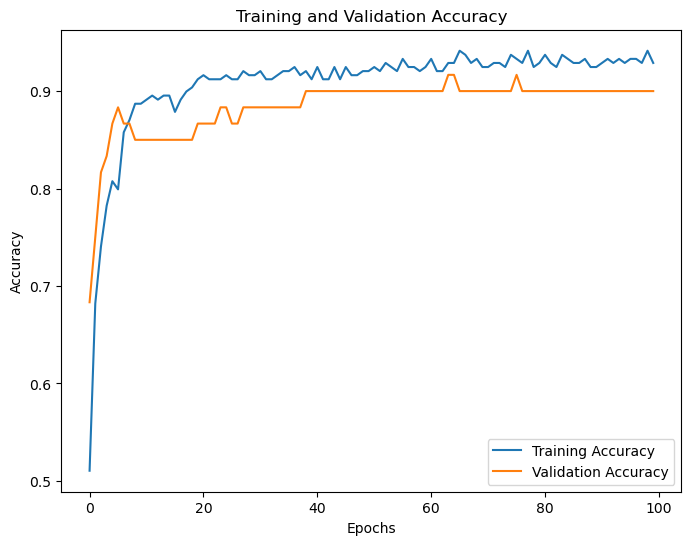

In [39]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define a neural network model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dropout(0.3),  # Dropout for regularization
    Dense(32, activation='relu'),  # Hidden layer
    Dense(len(label_encoder.classes_), activation='softmax')  # Output layer
])

# Compile the model
nn_model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

# Train the model
history = nn_model.fit(X_train, y_train,
                       epochs=100,  # Number of epochs
                       batch_size=32,
                       validation_split=0.2,  # Validation split
                       verbose=1)

# Evaluate the model
nn_loss, nn_accuracy = nn_model.evaluate(X_test, y_test, verbose=0)

# Print results
print(f"\nNeural Network Accuracy: {nn_accuracy:.2f}")

# Plot training vs. validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [40]:
nn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,459 (33.05 KB)

 Trainable params: 2,819 (11.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,640 (22.04 KB)

In [41]:
## So, SVM is best with 92 % accuracy.